In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv(r"C:\Users\Sujal Sahu\Downloads\Toyota.csv")
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86.0,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86.0,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86.0,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86.0,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
toyota= data.iloc[:,[2,3,6,8,12,13,15,16,17]]
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86.0,1300,3,5,69,1025
1432,10845,72,19000,86.0,1300,3,5,69,1015
1433,8500,71,17016,86.0,1300,3,5,69,1015
1434,7250,70,16916,86.0,1300,3,5,69,1015


In [5]:
toyota.rename(columns={"Age_08_04":"Age","Quarterly_Tax":"QT"},inplace=True)
toyota

C:\Users\Sujal Sahu\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86.0,1300,3,5,69,1025
1432,10845,72,19000,86.0,1300,3,5,69,1015
1433,8500,71,17016,86.0,1300,3,5,69,1015
1434,7250,70,16916,86.0,1300,3,5,69,1015


In [6]:
toyota[toyota.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116.0,2000,5,5,234,1320


In [7]:
toyota1=toyota.drop_duplicates().reset_index(drop=True)
toyota1

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86.0,1300,3,5,69,1025
1431,10845,72,19000,86.0,1300,3,5,69,1015
1432,8500,71,17016,86.0,1300,3,5,69,1015
1433,7250,70,16916,86.0,1300,3,5,69,1015


In [8]:
toyota1.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170


In [9]:
toyota1.tail()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
1430,7500,69,20544,86.0,1300,3,5,69,1025
1431,10845,72,19000,86.0,1300,3,5,69,1015
1432,8500,71,17016,86.0,1300,3,5,69,1015
1433,7250,70,16916,86.0,1300,3,5,69,1015
1434,6950,76,1,110.0,1600,5,5,19,1114


In [10]:
toyota1.shape

(1435, 9)

In [11]:
toyota1.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.503140,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.988316,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [12]:
toyota1.isna().sum()

Price     0
Age       0
KM        0
HP        2
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [13]:
toyota1[toyota1.isna().any(axis=1)]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
7,18600,30,75889,NaN,2000,3,5,210,1245
38,15750,32,25329,NaN,1400,3,5,85,1100


In [14]:
toyota1=toyota1.dropna()
toyota1.shape

(1433, 9)

In [15]:
toyota1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876045,-0.570203,0.316412,0.123599,0.186903,0.064334,0.208122,0.573904
Age,-0.876045,1.000000,0.504605,-0.156549,-0.096110,-0.149278,-0.005901,-0.191273,-0.465186
KM,-0.570203,0.504605,1.000000,-0.333279,0.103444,-0.035965,0.014804,0.283894,-0.024096
HP,0.316412,-0.156549,-0.333279,1.000000,0.035677,0.091091,0.209590,-0.301712,0.089396
cc,0.123599,-0.096110,0.103444,0.035677,1.000000,0.079792,0.014795,0.304963,0.334376
Doors,0.186903,-0.149278,-0.035965,0.091091,0.079792,1.000000,-0.160447,0.110026,0.306087
Gears,0.064334,-0.005901,0.014804,0.209590,0.014795,-0.160447,1.000000,-0.004851,0.021700
QT,0.208122,-0.191273,0.283894,-0.301712,0.304963,0.110026,-0.004851,1.000000,0.619452
Weight,0.573904,-0.465186,-0.024096,0.089396,0.334376,0.306087,0.021700,0.619452,1.000000


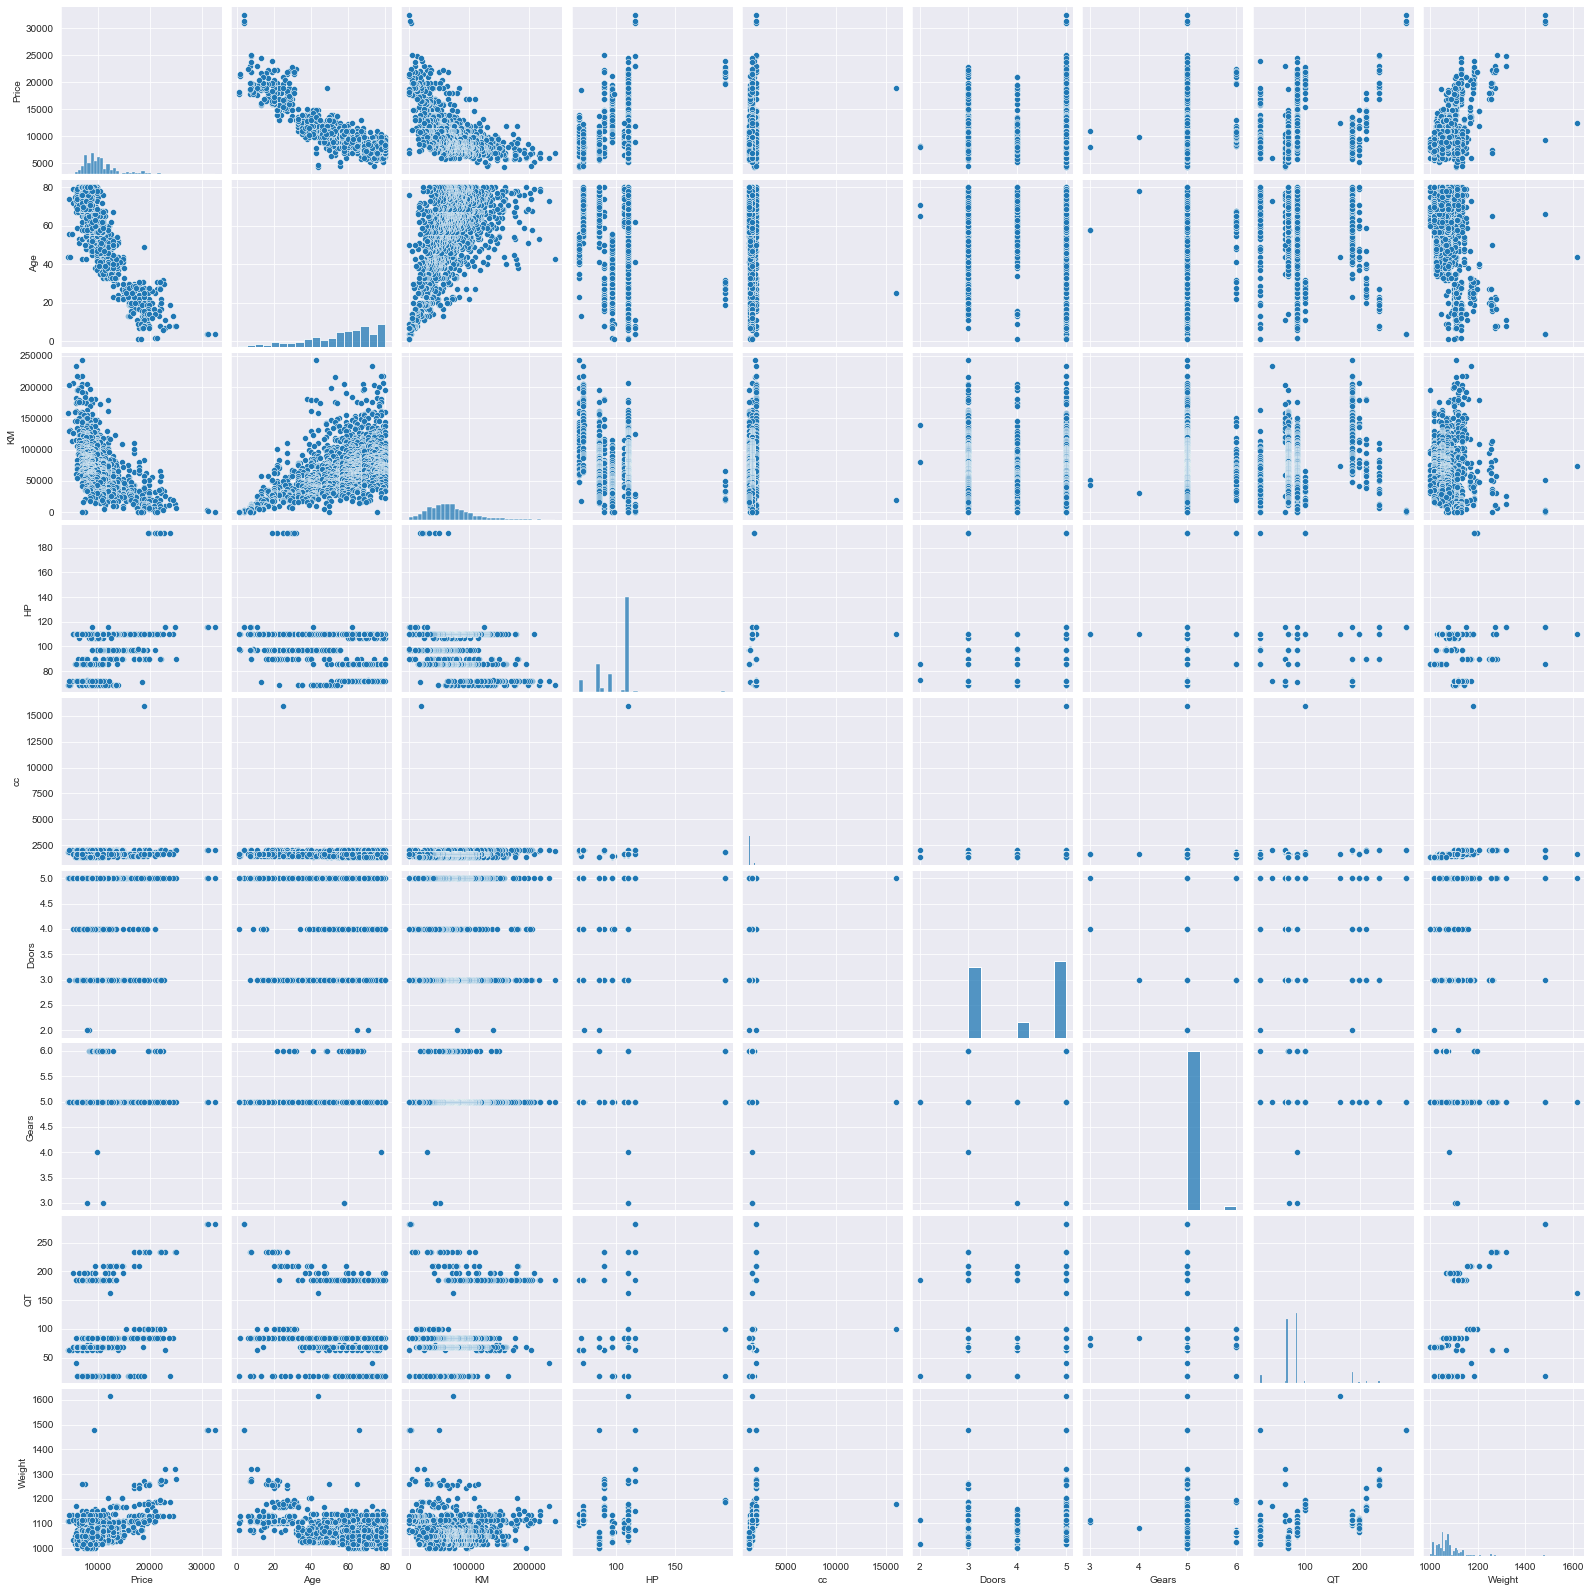

In [16]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota1)

In [17]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota1).fit()

In [18]:
model.params

Intercept   -5408.896028
Age          -121.698872
KM             -0.020712
HP             31.664670
cc             -0.117027
Doors           3.236899
Gears         601.694789
QT              3.832667
Weight         16.749870
dtype: float64

In [19]:
model.tvalues

Intercept    -3.828972
Age         -46.547581
KM          -16.532785
HP           11.237564
cc           -1.299556
Doors         0.080783
Gears         3.055055
QT            2.923987
Weight       15.633974
dtype: float64

In [20]:
model.pvalues

Intercept     1.342649e-04
Age          2.806292e-288
KM            2.661024e-56
HP            3.915588e-28
cc            1.939636e-01
Doors         9.356257e-01
Gears         2.291986e-03
QT            3.510441e-03
Weight        5.726617e-51
dtype: float64

In [21]:
model.rsquared

0.8621154742183653

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1113.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:38:01   Log-Likelihood:                -12349.
No. Observations:                1433   AIC:                         2.472e+04
Df Residuals:                    1424   BIC:                         2.476e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5408.8960   1412.624     -3.829      0.000   -8179.943   -2637.849
Age         -121.6989      2.615    -46.548      0.000    -126.828    -116.570
KM            -0.0207      0.001    -16.533      0.000      -0.023      -0.018
HP            31.6647      2.818     11.238      0.000      26.137      37.192
cc            -0.1170      0.090     -1.300      0.194      -0.294       0.060
Doors          3.2369     40.069      0.081      0.936     -75.364      81.837
Gears        601.6948    196.951      3.055      0.002     215.350     988.039
QT             3.8327      1.311      2.924      0.004       1.261       6.404
Weight        16.7499      1.071     15.634      0.000      14.648      18.852
==============================================================================
Omnibus:                      147.212   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              982.591
Skew:                          -0.190   Prob(JB):                    4.30e-214
Kurtosis:                       7.039   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model_age=smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_age=1/(1-model_age)

model_km=smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_km=1/(1-model_km)

model_hp=smf.ols('HP~Age+KM+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_hp=1/(1-model_hp)

model_cc=smf.ols('cc~Age+KM+HP+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_cc=1/(1-model_cc)

model_doors=smf.ols('Doors~Age+KM+HP+cc+Gears+QT+Weight',data=toyota).fit().rsquared
vif_doors=1/(1-model_doors)

model_gears=smf.ols('Gears~Age+KM+HP+cc+Doors+QT+Weight',data=toyota).fit().rsquared
vif_gears=1/(1-model_gears)

model_qt=smf.ols('QT~Age+KM+HP+cc+Doors+Gears+Weight',data=toyota).fit().rsquared
vif_qt=1/(1-model_qt)

model_wt=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QT',data=toyota).fit().rsquared
vif_wt=1/(1-model_wt)

In [24]:
d1={'Variables':['Age','KM','HP','cc','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_wt]}
df=pd.DataFrame(d1)
df

,Variables,Vif
0,Age,1.880430
1,KM,1.755703
2,HP,1.419408
3,cc,1.163143
4,Doors,1.159731
5,Gears,1.098868
6,QT,2.298233
7,Weight,2.506682


In [25]:
residuals=model.resid
residuals

0      -3271.260692
1      -2483.760877
2      -2808.818169
3      -1435.162001
4      -2428.880851
           ...     
1430   -1290.654346
1431    2554.961481
1432      47.169794
1433   -1326.600288
1434   -3444.673913
Length: 1433, dtype: float64

C:\Users\Sujal Sahu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

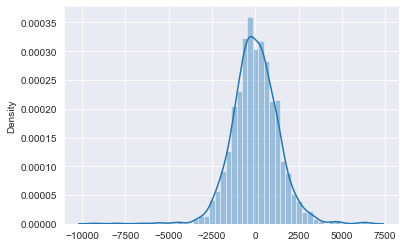

In [26]:
sns.distplot(residuals)

In [27]:
residuals.mean()

-4.291591331666883e-09

<function matplotlib.pyplot.show(close=None, block=None)>

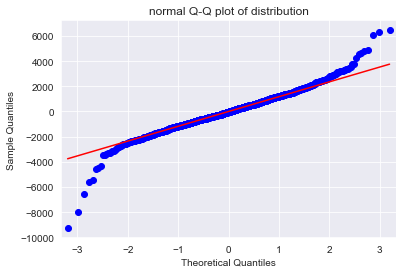

In [28]:
import statsmodels.api as sm  
qqplot=sm.qqplot(model.resid,line='q')
plt.title("normal Q-Q plot of distribution")
plt.show

In [29]:
list(np.where(residuals>6000))

[array([107, 144, 520], dtype=int64)]

In [30]:
list(np.where(residuals<-6000))

[array([218, 598, 957], dtype=int64)]

In [31]:
predictions=model.fittedvalues
predictions

0       16771.260692
1       16233.760877
2       16758.818169
3       16385.162001
4       16178.880851
            ...     
1430     8790.654346
1431     8290.038519
1432     8452.830206
1433     8576.600288
1434    10394.673913
Length: 1433, dtype: float64

In [32]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

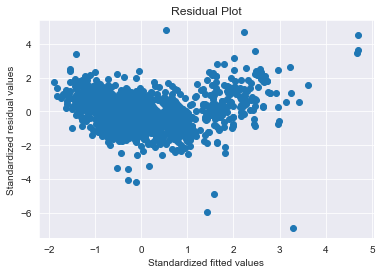

In [33]:
plt.scatter(get_standardized_values(predictions),
            get_standardized_values(residuals))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

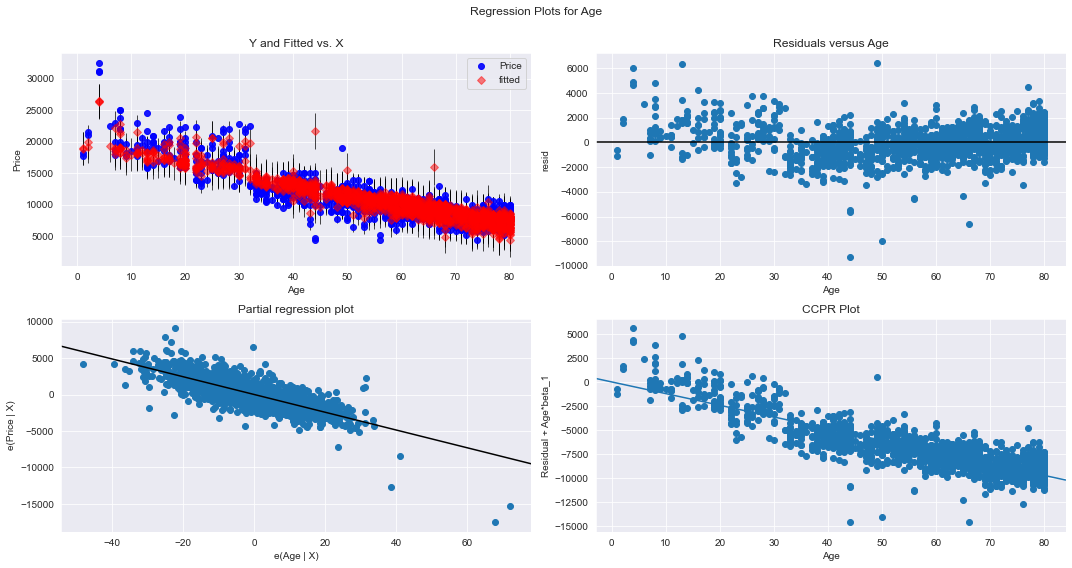

In [34]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

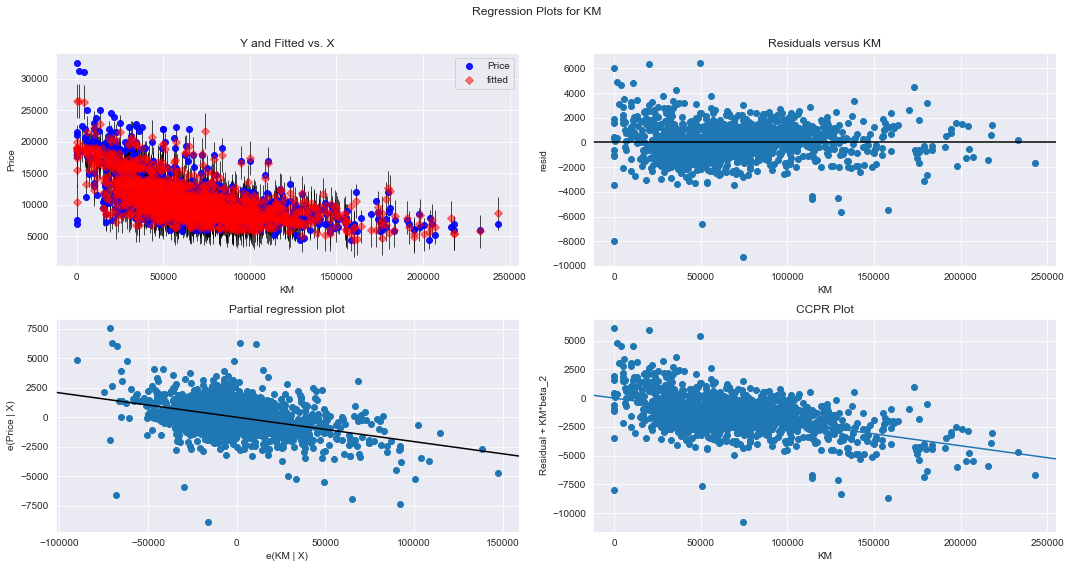

In [35]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

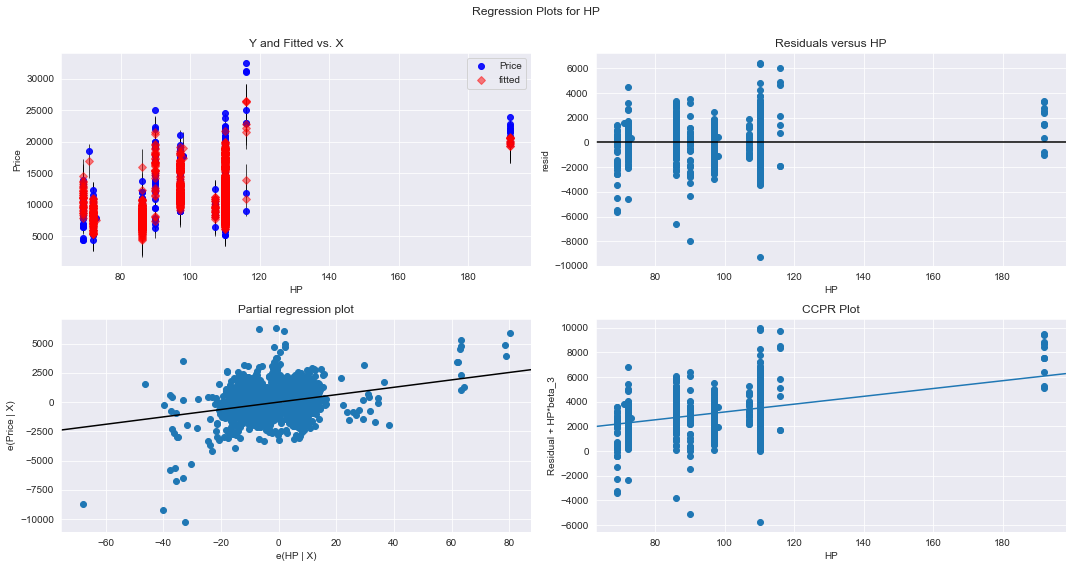

In [36]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

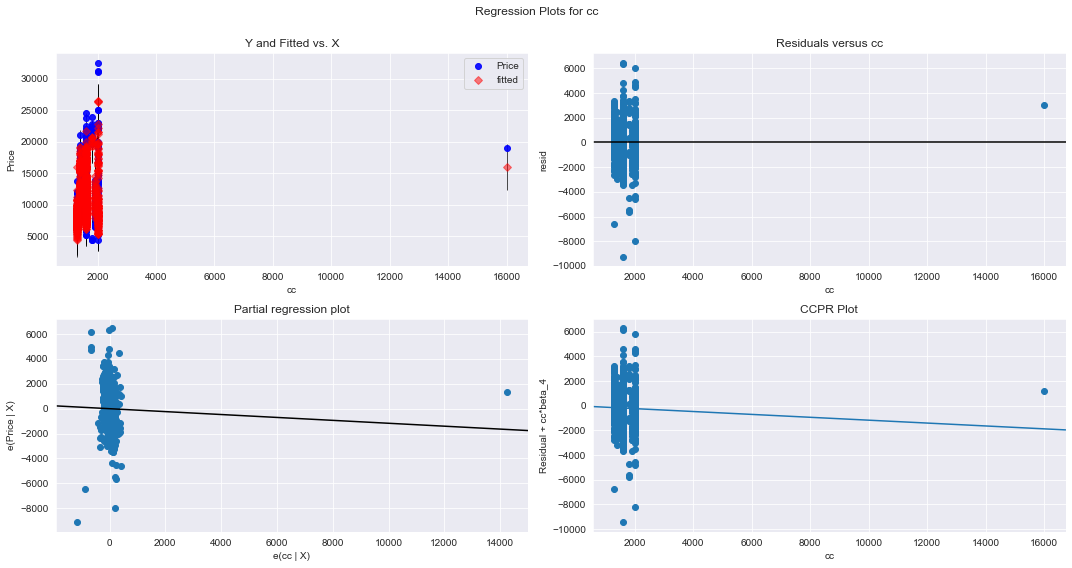

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

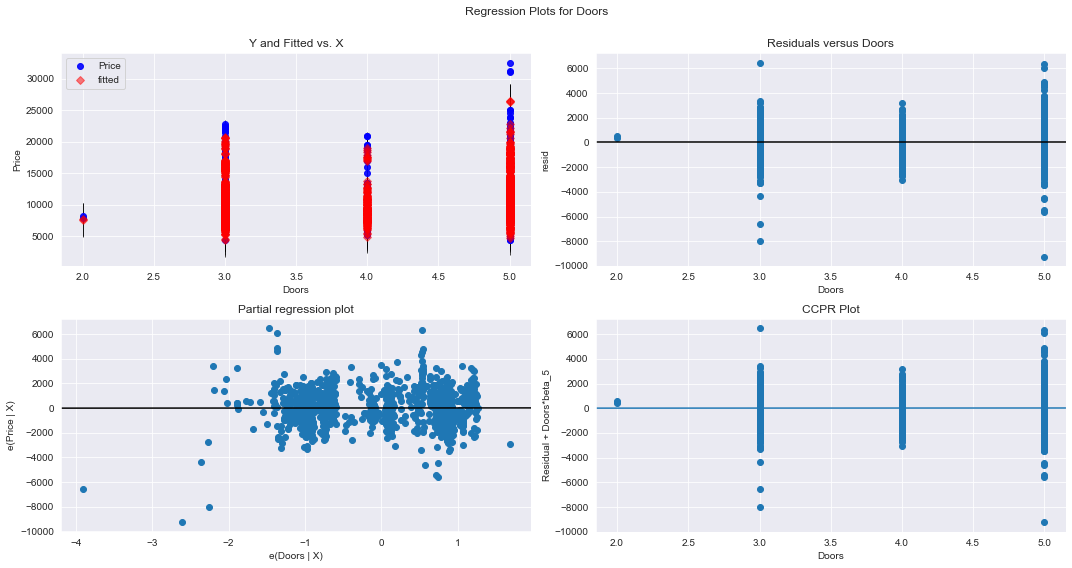

In [38]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

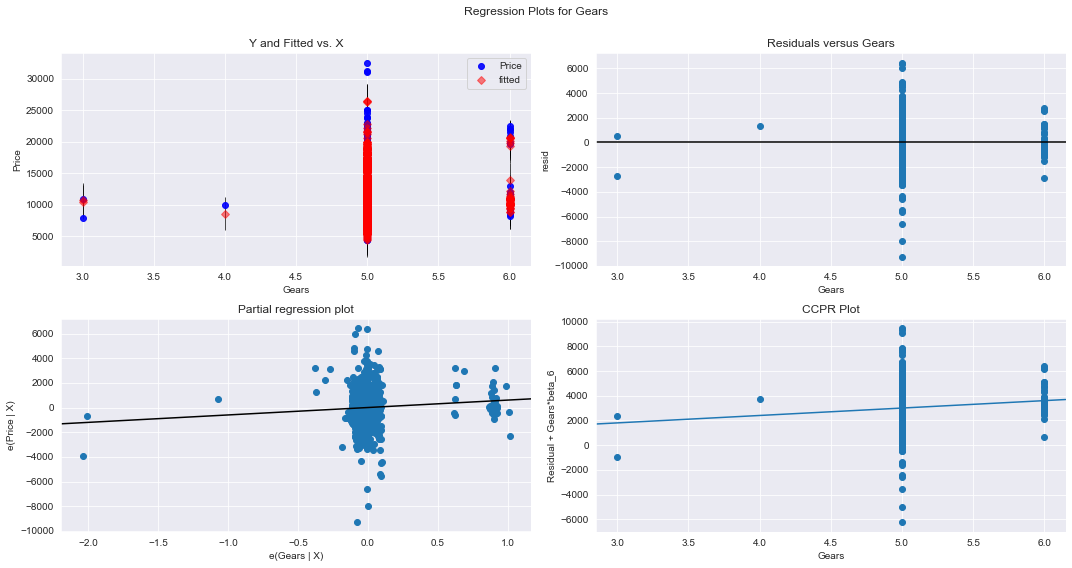

In [39]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

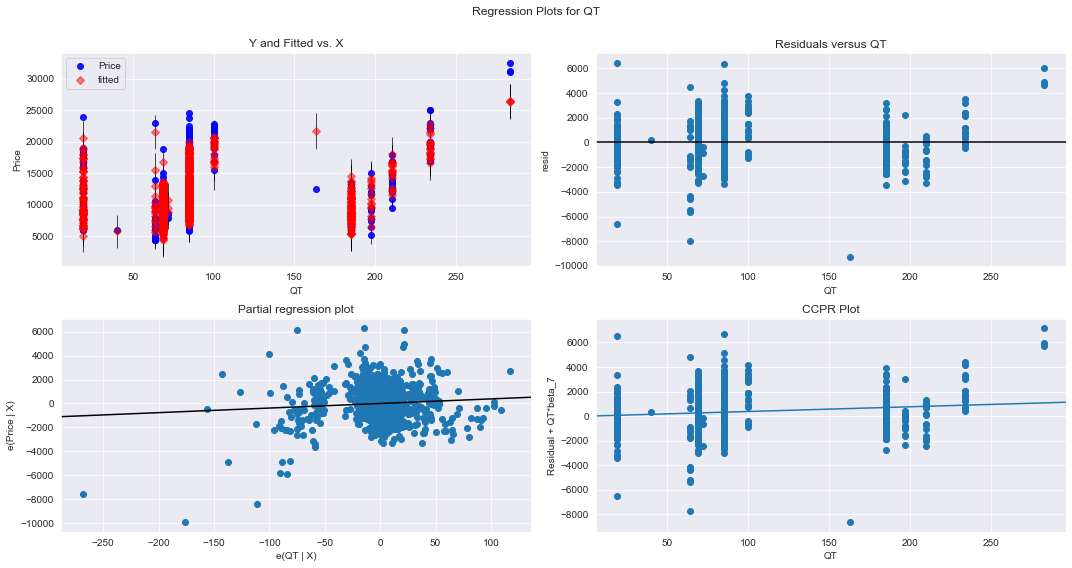

In [40]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

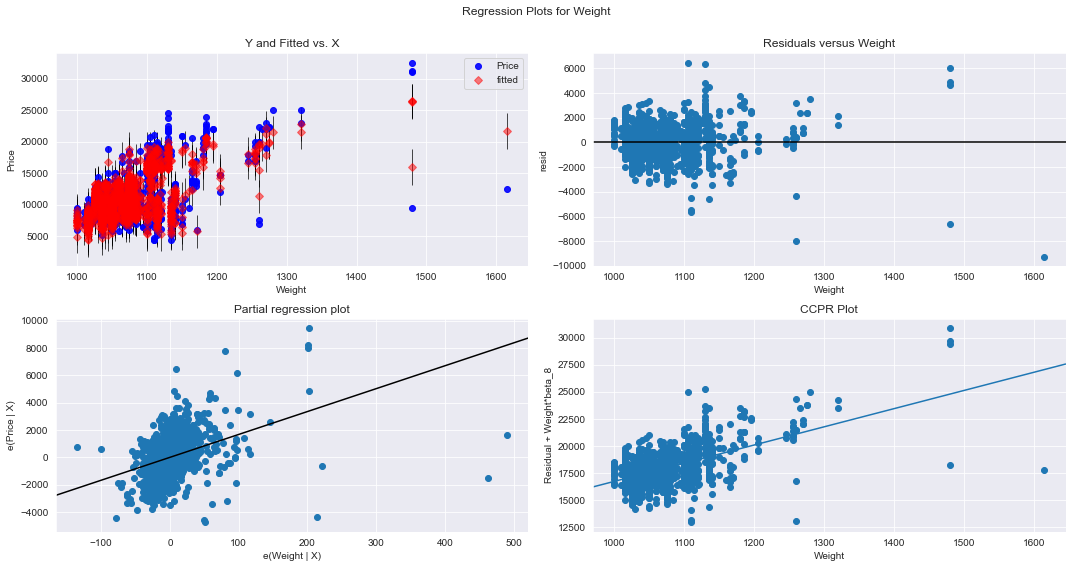

In [41]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [42]:
model_influence=model.get_influence()
(c, _)=model_influence.cooks_distance

In [43]:
c

array([7.20019747e-03, 3.91974773e-03, 5.41359424e-03, ...,
       9.01816675e-07, 6.97884848e-04, 1.08368316e-02])

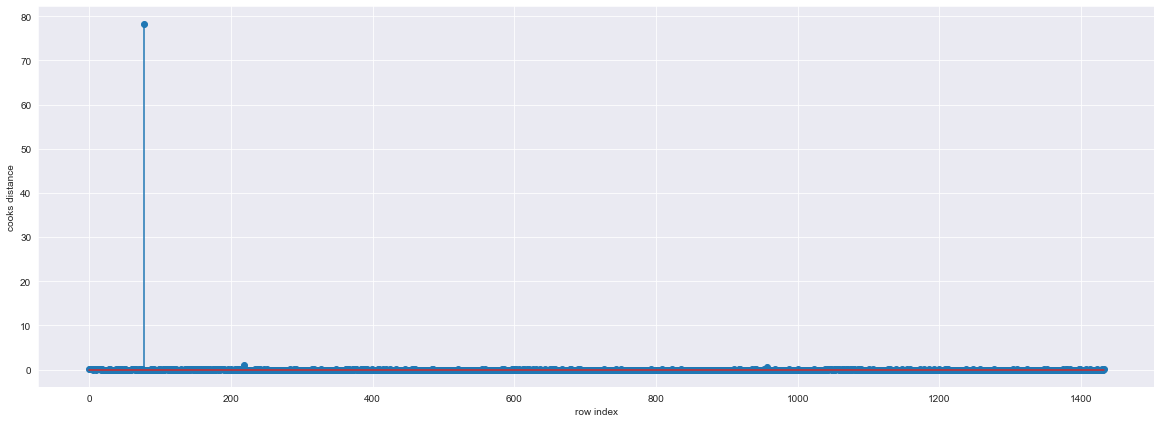

In [44]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota1)),np.round(c,8))
plt.xlabel("row index")
plt.ylabel("cooks distance")
plt.show()

In [45]:
(np.argmax(c),np.max(c))

(78, 78.32370087558583)

<Figure size 1440x720 with 0 Axes>

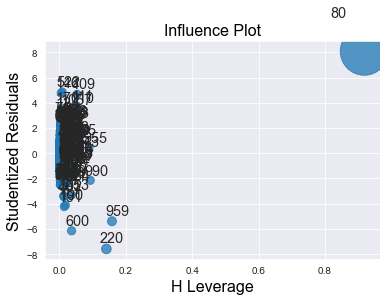

In [46]:
from statsmodels.graphics.regressionplots import influence_plot
plt.figure(figsize=(20,10))
influence_plot(model)
plt.show()

In [47]:
k=toyota1.shape[1] #no of features(columns)
n=toyota1.shape[0]#no of observations(rows)
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.0209351011863224

In [48]:
toyota1.iloc[[78],:]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110.0,16000,5,5,100,1180


In [49]:
toyota1.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170


In [50]:
toyota_new=pd.read_csv(r"C:\Users\Sujal Sahu\Downloads\Toyota.csv")

In [51]:
toyota2=toyota1.drop(toyota1.index[[80]],axis=0).reset_index()

In [52]:
toyota2=toyota2.drop(['index'],axis=1)

In [53]:
toyota2

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86.0,1300,3,5,69,1025
1428,10845,72,19000,86.0,1300,3,5,69,1015
1429,8500,71,17016,86.0,1300,3,5,69,1015
1430,7250,70,16916,86.0,1300,3,5,69,1015


In [54]:
final_ml_qt=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT',data=toyota2).fit()
(final_ml_qt.rsquared,final_ml_qt.aic,final_ml_qt.bic)

(0.8382619454873894, 24923.94225390209, 24966.076872682253)

In [55]:
final_ml_wt=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Weight',data=toyota2).fit()
(final_ml_wt.rsquared,final_ml_wt.aic,final_ml_wt.bic)

(0.861142077833519, 24705.523859963665, 24747.65847874383)

In [62]:
model_influence_qt=final_ml_qt.get_influence()
(c_qt, _)=model_influence_qt.cooks_distance

In [64]:
len(c_qt)

1432

Text(0, 0.5, 'cooks distance')

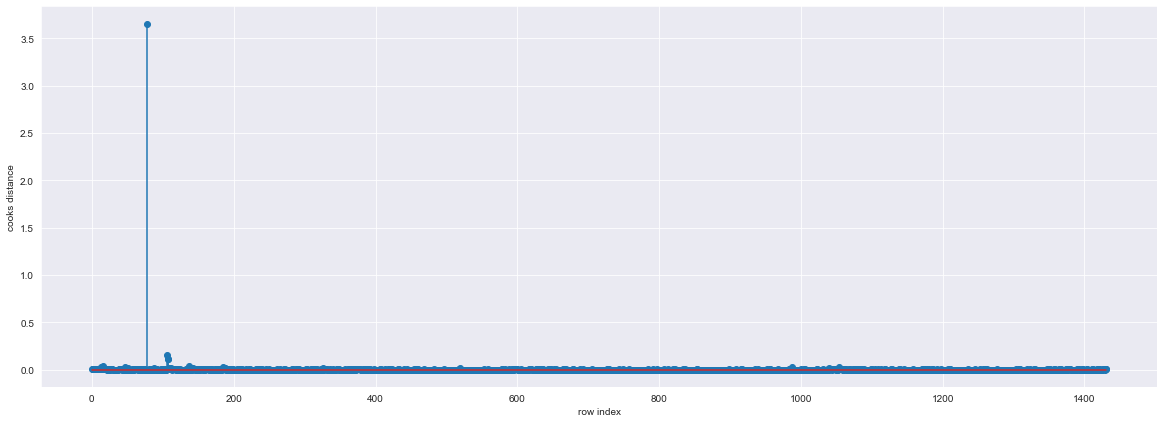

In [65]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota2)),np.round(c_qt,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')

In [66]:
(np.argmax(c_qt),np.max(c_qt))

(78, 3.657477083424181)

In [67]:
toyota3=toyota2.drop(toyota2.index[[78]],axis=0)
toyota3

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86.0,1300,3,5,69,1025
1428,10845,72,19000,86.0,1300,3,5,69,1015
1429,8500,71,17016,86.0,1300,3,5,69,1015
1430,7250,70,16916,86.0,1300,3,5,69,1015


In [68]:
final_ml_qt=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT',data=toyota3).fit()

In [69]:
(final_ml_qt.rsquared,final_ml_qt.aic,final_ml_qt.bic)

(0.8380105658949086, 24904.52183426968, 24946.65086450613)

In [70]:
new_data=pd.DataFrame({'Age':25,'KM':40000,'HP':80,'cc':1500,'Doors':3,'Gears':5,'QT':180,'Weight':1050}, index=[1])
new_data

,Age,KM,HP,cc,Doors,Gears,QT,Weight
1,25,40000,80,1500,3,5,180,1050


In [71]:
final_ml_qt.predict(new_data)

1    15977.839895
dtype: float64

In [72]:
pred_y=final_ml_qt.predict(toyota2)
pred_y

0       16887.268840
1       16387.791443
2       16852.261718
3       16458.148216
4       16094.855202
            ...     
1427     8769.436626
1428     8389.549680
1429     8564.270355
1430     8702.729791
1431     8635.226405
Length: 1432, dtype: float64